In [213]:
%matplotlib inline


# Topic extraction with Non-negative Matrix Factorization 
### How to select an area of research in Chemical Engineering? 
### Analysis of Industrial & Engineering Chemistry Reseach (IECR) Journal 


## Load Data

In [1]:
from importlib import reload  # Python 3.4+ only.
import IECRAbstract as func
import IECRAbstractPlots as PlFunc

filename = 'IECR-1996-2019-with-citations.csv'
df = (func.loadData(filename)).df

Loading dataset...
done in 5.970s.


## tf-idf transformation

In [215]:
n_samples = 2000
n_features = 7000
n_components = 8
n_top_words = 10

tfidf_vectorizer = func.tfidfTansformation(df, n_features)


Extracting tf-idf features for NMF...
done in 20.732s.


## Non-negetive Matrix Factorization

In [216]:
out = func.NMFoperation(df, n_samples, n_features, n_components, n_top_words, tfidf_vectorizer)

dfFinal = out.dfFinal
HAll = out.HAll
WAll = out.Wall

# dtopWords = out.dtopWords
# print("\nTopics in NMF model (Frobenius norm):")
# dtopWords


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=7000...


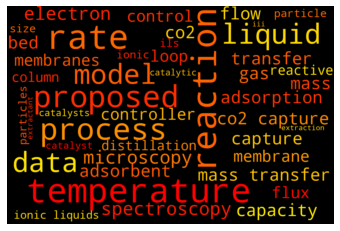

,Popularity,topWords,Year
0,0.14,"[reaction, temperature, rate, reactor, acid, k...",All
2,0.11,"[process, model, proposed, optimization, desig...",All
6,0.09,"[data, liquid, model, experimental, equation, ...",All
9,0.08,"[spectroscopy, electron, microscopy, ray, elec...",All
1,0.07,"[co2, capture, co2 capture, gas, absorption, n...",All
3,0.07,"[transfer, mass transfer, mass, liquid, transf...",All
4,0.07,"[adsorption, adsorbent, capacity, adsorption c...",All
8,0.07,"[flow, gas, bed, liquid, bubble, velocity, flu...",All
5,0.06,"[membrane, membranes, flux, separation, permea...",All
11,0.06,"[control, controller, loop, nonlinear, feedbac...",All


In [217]:
n_components=15
out = func.NMF2ndlayer(HAll,n_components)
L = out.L
U = out.U

# Popularity Ranking
n_top_words = 10
dSup = (func.GetTopWords(n_top_words, U, nmf, tfidf_vectorizer)).dSup

PlFunc.TopicWordClout(dSup)
dSup

In [218]:
# sim = func.plotSimilarity(L)

## Tracking annual popularity of topics

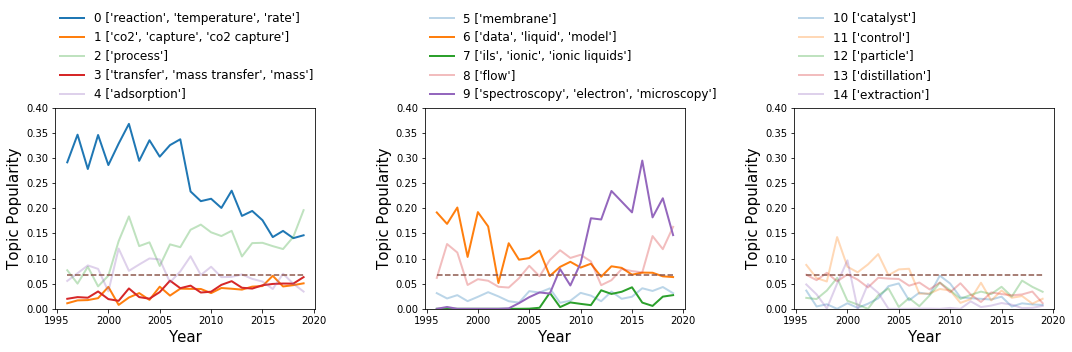

In [219]:
out = func.YearlyPopularity(WAll,U)
P = out.P
LHSmega = out.LHSmega

PlFunc.YearlyTrendsPlot(dSup, P)

## Level of collaboration annually
The number of authors per paper is taken as a representative measure of collaboration

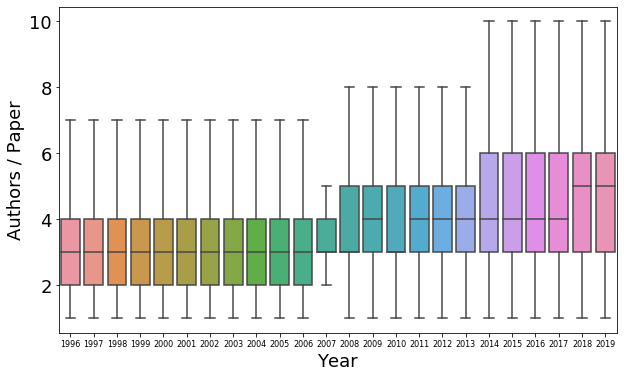

In [220]:
dfPlot = dfFinal[dfFinal['Year']>=1996]

PlFunc.CollaborationPlot(dfPlot)

## Analyzing Citations - adding corresponding author and yearly averaged citation data to dataframe

In [221]:
out = func.Impact(df)
out.avgTot = avgTot
out.impactFactor = impactFactor

dfPlot = func.Add_Citations_Corresponding_Author(dfPlot)

Assingning topics to papers

In [223]:
out = func.LHSmega2ArgVal(LHSmega)
argsAll = out.argsAll
valsAll = out.valsAll

## Analysis of level of monopoly per researcher and topic-wise impact in terms of citations

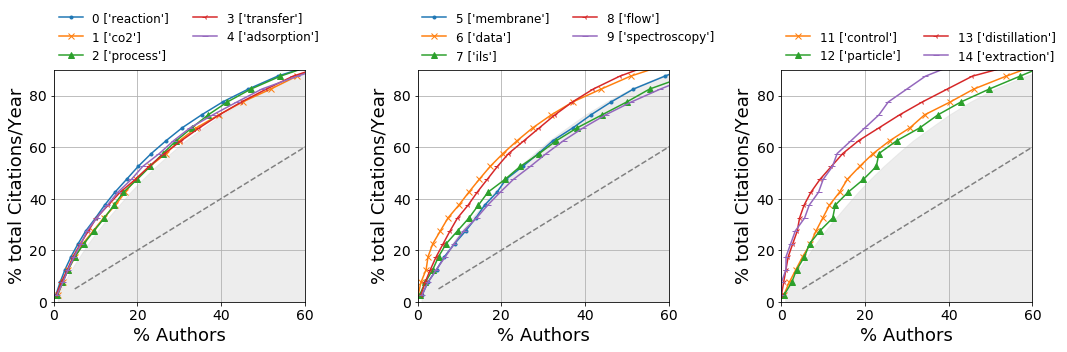

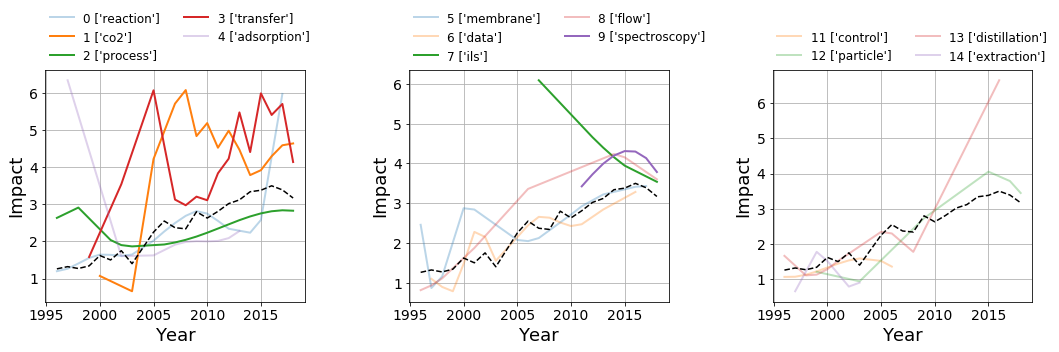

In [224]:
import plotCompetetion as Func
# reload(Func)
Func.Competetion(dSup, dfPlot, avgTot, argsAll, valsAll )

In [225]:
# UniqueAuthors = dfTemp['Corresponding Author'].unique()
# CitedUniqueAuthors = df0New['Corresponding Author'].unique()
# print(len(CitedUniqueAuthors))
# print(len(UniqueAuthors))

# t0 = time()
# dfAuth = pd.DataFrame()
# for i in UniqueAuthors:
#     df20 = dfTemp[(dfTemp['Corresponding Author']==i)]
#     df2 = getTotCitations(df20,i)
# #     print(df2)
#     dfAuth = dfAuth.append(df2, ignore_index=True)

# dfAuthHigh = pd.DataFrame()
# for i in CitedUniqueAuthors:
#     df20 = df0New[(df0New['Corresponding Author']==i)]
#     df2 = getTotCitations(df20,i)
# #     print(df2)
#     dfAuthHigh = dfAuthHigh.append(df2, ignore_index=True)

# # print(dfAuth)
# print("done in %0.3fs." % (time() - t0))

In [226]:
num = 0
for i in range(len(WAll)):
    num = num + WAll[i].shape[0]
print(num)
print(len(df))
print('Years =',len(LHSmega))
print('Shape of LHSmega for Year 0 =', LHSmega[0].shape)
print('No of entries in Year 0 =',len(df[df.Year==1996]))

26867
27259
Years = 24
Shape of LHSmega for Year 0 = (524, 15)
No of entries in Year 0 = 524


In [227]:
def getTotCitations(df,Author):
    da = pd.DataFrame() #columns = ['Year','CumCit','Author'])
    auth = []
    citations = []
    year = []
    nPaper = []
    cit = 0; nP = 0
    x = pd.DataFrame()
    for j in range(1996,2020):
        dfTemp = df[df['Year']==j]
        if len(dfTemp) > 0:
            cit = cit + dfTemp['Annual Citations'].sum()
            nP = nP + len(dfTemp)
            citations.append(cit)
            year.append(j)
            auth.append(Author)
            nPaper.append(nP)
    da['Year']=year
    da['CumCit'] = citations
    da['Author'] = auth
    da['nPapers'] = nPaper
    return da